## Introduction to Python automation for Geospatial Data Vis

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # Silence some warnings

Resources
- https://www.usgs.gov/publications/geography-islands

In [3]:
import os
os.chdir(r'd:\git20\GeoPython_Ukraine2024')

In [4]:
gdf_countries = gpd.read_file(r'.\data\Islands_Europe.shp')
gdf_countries = gdf_countries.to_crs('ESRI:54030')
gdf_countries['area'] = gdf_countries.geometry.area
gdf_countries = gdf_countries.sort_values('area', ascending=False)
gdf_countries.head(3)

,OBJECTID_1,Name_USGSO,Plate,USGS_ISID,NEAR_FID,NEAR_DIST,ALL_Uniq,Linework_S,Meaning_AL,ID_GID,...,ChangeRef,Shape_Leng,IslandArea,IslandCoas,Area_Geode,Coast_Geod,Shape_Le_1,Shape_Area,geometry,area
7,2877,Sicily,Africa,318901,226128,0.0,273768,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,239499.0,...,NaN,1.191976e+06,25498.341449,1191.975839,25454.283083,1190.178528,1.191976e+06,2.549834e+10,"POLYGON ((1364610.770 4095619.343, 1364624.585...",2.438564e+10
6,2873,Sardinia,Eurasia,318897,225976,0.0,273764,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,239347.0,...,NaN,1.453380e+06,23826.572993,1453.379616,23799.014515,1451.665802,1.453380e+06,2.382657e+10,"POLYGON ((740614.637 4176073.394, 740545.434 4...",2.323869e+10
8,2904,Cyprus,Anatolia,318928,227074,0.0,273795,USGS: Sayre et al. 2018,USGS poly had WCMC poly intersect/overlap,240763.0,...,NaN,7.537467e+05,9283.519703,753.746689,9262.226924,757.314325,7.537467e+05,9.283520e+09,"POLYGON ((3071979.179 3817772.410, 3071982.627...",8.706992e+09


In [5]:
list_countries = gdf_countries.Name_USGSO.unique()[0:14]
list_countries

array(['Sicily', 'Sardinia', 'Cyprus', 'Corsica', 'Crete', 'Euboea',
       'Majorca', 'Tenerife', 'Lesbos', 'Danube Delta', 'Fuerteventura',
       'Gran Canaria', 'Rhodes', 'UNNAMED'], dtype=object)

In [6]:
fig, axs = plt.subplots(int(len(list_countries)/4), 4, figsize=(12,(len(list_countries)/4)*2))
axs = axs.flatten()
plt.rcParams['figure.facecolor'] = 'lightsteelblue'

for i, country in (enumerate(list_countries)):
    try:
        gdf_cntr = gdf_countries[gdf_countries.Name_USGSO==country]

        ax = axs[i]
        range_num = 10
        for buf_num in range(0, range_num):
            alpha = 1 - buf_num/range_num
            gdf_cntr.geometry.buffer(buf_num ** 3.6 * 10).boundary.plot(ax=ax, alpha=alpha, 
                                                                    color='steelblue', linewidth=0.5)
        if i <1:
            print(country)
            bounds = gdf_cntr.geometry.buffer(50_000).bounds
            cntr_width = bounds.maxx - bounds.minx
            cntr_hight = bounds.maxy - bounds.miny
        

        gdf_cntr.plot(ax=ax, color='cornsilk', linewidth=0)
        
        ax.axis('off')
        ax.set_title(country)
        ax.set_xlim(int(gdf_cntr.centroid.x) - int(cntr_width)/2.2, int(gdf_cntr.centroid.x) + int(cntr_hight)/2.5)
    except:
        pass

Sicily


In [ ]:
# test kolorow
plt.rcParams['figure.facecolor'] = 'lightsteelblue'
# brudnopis - budory i inne
gdf_cntr = gdf_countries[gdf_countries.Name_USGSO=='Cyprus']

(2833254.0350810676, 3111919.270224733, 3660522.7713215267, 3853789.5140544446)

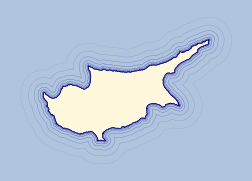

In [ ]:
# test pojedyncza mapka
fig, ax = plt.subplots(figsize=(3,3))

range_num = 10
for buf_num in range(0, range_num):
    alpha = 1 - buf_num/10
    gdf_cntr.geometry.buffer(buf_num ** 3.6 * 10).boundary.plot(ax=ax, alpha=alpha, 
                                                              color='navy', linewidth=0.3)

if i <1:
    print(country)
    bounds = gdf_cntr.geometry.buffer(36_000).bounds
    cntr_hight = bounds.maxx - bounds.minx


gdf_cntr.plot(ax=ax, color='cornsilk', linewidth=0)

ax.axis('off')
# ax.set_title(country)
# ax.set_xlim(int(gdf_cntr.centroid.x) - int(cntr_hight)/2, int(gdf_cntr.centroid.x) + int(cntr_hight)/2)